In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import hvplot.pandas
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
# Read in the CSV file as a Pandas DataFrame
stationslist = pd.read_csv(
    Path("../../Resources/stationslist.csv")
)

# Keep only the specified columns
selected_columns = ['stationCode', 'latitude', 'longitude', 'altitude']
stationslist = stationslist[selected_columns]

# Drop rows containing NaN values in 'latitude' and 'longitude' columns
stationslist = stationslist.dropna(subset=['stationCode', 'latitude', 'longitude', 'altitude'])

# Create a copy of the "stationCode" column
site_no_copy = stationslist["stationCode"].copy()

# Drop the "stationCode" column from the DataFrame
stationslist = stationslist.drop("stationCode", axis=1)

# Convert the 'latitude' and 'longitude' columns to numeric values, handling errors by coercing to NaN
stationslist['latitude'] = pd.to_numeric(stationslist['latitude'], errors='coerce')
stationslist['longitude'] = pd.to_numeric(stationslist['longitude'], errors='coerce')

# Drop rows containing NaN values in 'latitude' and 'longitude' columns
stationslist = stationslist.dropna(subset=['latitude', 'longitude', 'altitude'])

# Review the resulting DataFrame
stationslist.head()

,latitude,longitude,altitude
0,-29.063612,114.997161,131.0
1,-34.270827,118.268523,200.0
2,-32.125480,118.004060,313.0
3,-30.338049,115.539491,284.0
4,-33.796200,116.063980,227.0


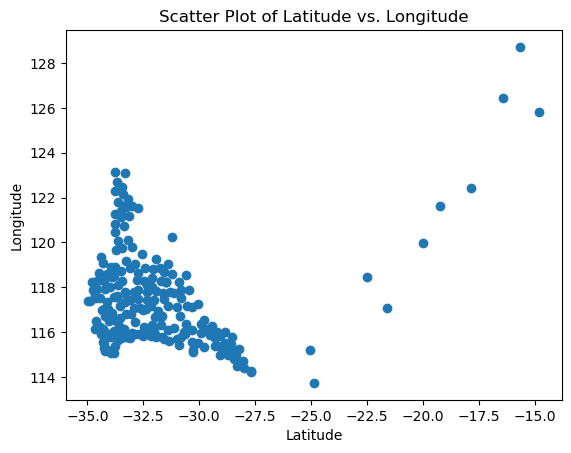

In [3]:
# Create a scatter plot using hvplot, displaying latitude on the x-axis and longitude on the y-axis
# stationslist.hvplot.scatter(x="latitude", y="longitude")
# Create a scatter plot using Matplotlib, displaying latitude on the x-axis and longitude on the y-axis
plt.scatter(stationslist['latitude'], stationslist['longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Latitude vs. Longitude')
plt.show()

In [4]:
# Create a geographic points plot using hvplot, displaying latitude on the x-axis and longitude on the y-axis
# This uses the "OSM" (OpenStreetMap) tiles and sets the size, width, and height of the plot
map_plot_1 = stationslist.hvplot.points("longitude", "latitude", xlabel='Longitude', ylabel='Latitude', geo=True, tiles="OSM", size=50, width=800, height=500)

# Display the created plot
map_plot_1

C:\Users\mh30f\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]

In [5]:
# Start by importing the K-means algorithm
from sklearn.cluster import KMeans

In [6]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [7]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(stationslist)
    inertia.append(k_model.inertia_)

C:\Users\mh30f\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mh30f\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mh30f\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mh30f\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [8]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,3.201660e+06
1,2,9.802766e+05
2,3,5.772789e+05
3,4,3.137433e+05
4,5,2.015819e+05


In [9]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

## Using k-means with four clusters

In [19]:
# Create and initialise the K-means model instance for 2 clusters
model = KMeans(n_clusters=5, random_state=1)

# Print the model
model

KMeans(n_clusters=5, random_state=1)

In [20]:
# Fit the data to the instance of the model
model.fit(stationslist)

C:\Users\mh30f\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mh30f\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

In [21]:
# Make predictions about the data clusters using the trained model
Route_tripe_group = model.predict(stationslist)

# Print the predictions
print(Route_tripe_group)

[3 4 0 4 4 0 0 0 4 3 3 4 4 0 1 1 1 4 1 1 0 0 0 0 1 0 1 3 4 4 3 3 1 4 0 0 4
 4 3 1 3 0 3 2 2 4 1 1 3 1 4 4 1 4 1 0 0 4 0 4 0 3 4 4 3 1 1 4 0 1 1 0 4 0
 3 0 1 0 0 0 4 4 3 0 0 4 1 0 2 1 0 0 0 0 4 0 4 1 3 0 0 0 4 1 0 0 3 0 4 3 0
 4 3 3 4 4 4 4 0 0 0 0 0 1 0 3 0 4 4 0 0 4 4 3 3 0 2 3 0 3 2 0 0 4 1 2 4 1
 3 3 0 3 0 0 0 4 3 3 1 0 0 0 0 1 3 0 0 0 0 0 3 1 0 4 0 1 3 0 4 1 4 0 3 4 4
 1 4 1 4 3 4 3 1 4 4 0 4 0 0 1 4 1 1 0 0 1 3 4 4 0 0 0 3 0 4 4 0 2 4 0 4]


In [22]:
# Create a copy of the DataFrame
predictions_df = stationslist.copy()

# Add a column to the DataFrame that contains the customer_ratings information
predictions_df['stations_Route_trip'] = Route_tripe_group

# Review the DataFrame
predictions_df.head()

,latitude,longitude,altitude,stations_Route_trip
0,-29.063612,114.997161,131.0,3
1,-34.270827,118.268523,200.0,4
2,-32.125480,118.004060,313.0,0
3,-30.338049,115.539491,284.0,4
4,-33.796200,116.063980,227.0,4


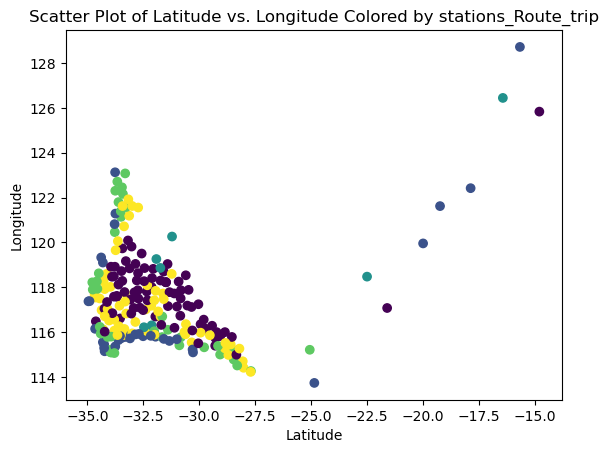

In [23]:
# Create a scatter plot using hvplot, displaying latitude on the x-axis and longitude on the y-axis
# The plot is colored by the 'stations_Route_trip' column
plt.scatter(predictions_df['latitude'], predictions_df['longitude'], c=predictions_df['stations_Route_trip'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Latitude vs. Longitude Colored by stations_Route_trip')
plt.show()

In [24]:
predictions_df['stationCode'] = site_no_copy
predictions_df.head()

,latitude,longitude,altitude,stations_Route_trip,stationCode
0,-29.063612,114.997161,131.0,3,AN001
1,-34.270827,118.268523,200.0,4,AM001
2,-32.125480,118.004060,313.0,0,SH002
3,-30.338049,115.539491,284.0,4,BA
4,-33.796200,116.063980,227.0,4,BP001


In [25]:
# Save the DataFrame to a CSV file, excluding the index column
predictions_df.to_csv('../../Resources/stationslist_with_Routetrip.csv', index=False)

In [26]:
# Create a geographic points plot using hvplot, displaying latitude on the x-axis and longitude on the y-axis
# This uses the "OSM" (OpenStreetMap) tiles and sets the size, width, and height of the plot
# The points are colored by the 'stations_Route_trip' column, and hover information includes the 'stationCode' column
map_plot_2 = predictions_df.hvplot.points("longitude", "latitude", xlabel='Longitude', ylabel='Latitude', geo=True, tiles="OSM", size=50,
                                        color="stations_Route_trip", hover_cols=["stationCode"],
                                        tools=["hover"], width=1000, height=800)

# Display the created plot
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (stations_Route_trip,stationCode)